In [116]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.hold(False)

In [117]:
data = pickle.load(open('pickle-dumps/madelon/16features_100samples_default-std.pickle','br'))
data['best_noisy'][:3]

[0.54462840236686394, 0.60944792899408284, 0.50374852071005916]

In [118]:
N_features = [2,3,5,7,11,13,16]
folder = 'pickle-dumps/madelon/'
stds = ['1e-07', '0.050', '0.100', '0.200', '0.300', '0.500']

In [119]:
def get_filename(n_feat, std):
    return '{}features_100samples_{}std.pickle'.format(n_feat, std)

In [123]:
means = dict()
l = list()
for n_feat in N_features:
    for std in stds:
        data = pickle.load(open(folder+get_filename(n_feat, std),'rb'))
        means[std] = np.mean(data['best_noisy'])
    plt.plot([0, 0.05, 0.1, 0.2, 0.3, 0.5],[means[std] for std in stds], 'o')
    plt.hold(True)
    print([means[std] for std in stds[:4]])
    l.append(n_feat)



[0.61727100591715978, 0.60768592899408291, 0.51687277514792895, 0.50735456804733736]
[0.63079408284023686, 0.60839536686390527, 0.52904518343195273, 0.50598524852071014]
[0.62601005917159747, 0.62058965680473366, 0.54282332544378697, 0.51576713609467451]
[0.62961479289940847, 0.62640418934911246, 0.54613322485207094, 0.51868524852071007]
[0.64213668639053256, 0.62771852662721894, 0.56256278106508872, 0.52689769822485211]
[0.64194378698224852, 0.63075407100591718, 0.56660207692307696, 0.53107894082840224]
[0.64362958579881646, 0.63139887573964493, 0.56399527810650885, 0.53477915976331358]


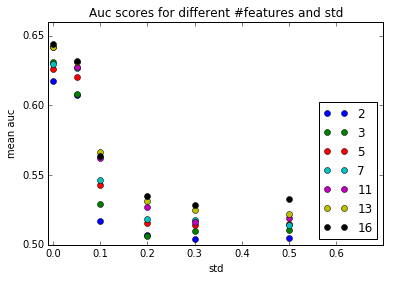

In [124]:
plt.title('Auc scores for different #features and std')
plt.legend(l, loc=4)
plt.xlim([-.01, .7])
plt.xlabel('std')
plt.ylabel('mean auc')
fig1 = plt.gcf()
plt.show()
fig1.savefig('plots/madelon/auc_std.png', dpi=100)